## Pertemuan 10
## K-Means

### Nama : M. Yogi Dwiyanto
### NIM  : 221351073
### Kelas : Pagi C

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('pelanggan.csv')

In [3]:
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514


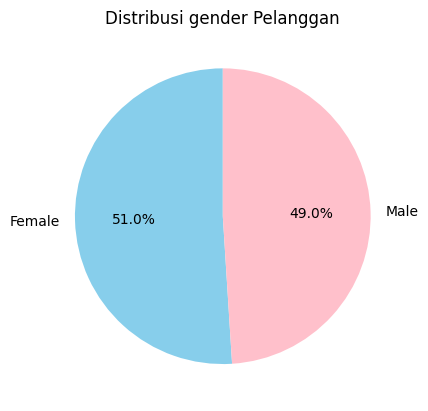

In [4]:
# Pie chart
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',colors=['skyblue','pink'],startangle=90)
plt.title("Distribusi gender Pelanggan")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_3080\1459352370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


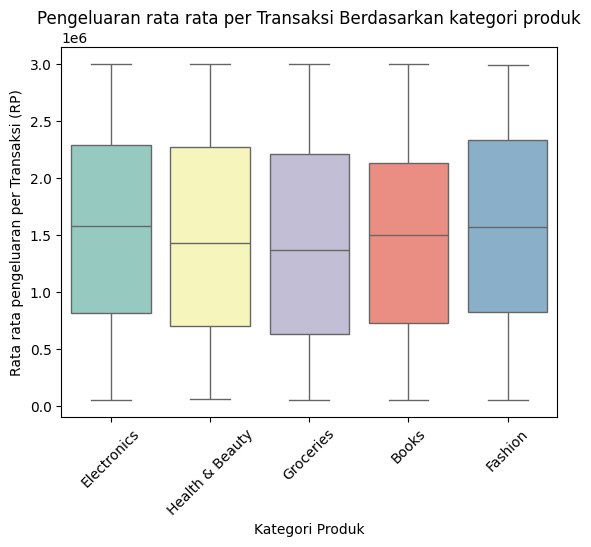

In [5]:
# boxplot
sns.boxplot(data=df,
            x='Preferred_Product_Category',
            y='Average_Spending_Per_Transaction',
            palette='Set3')
plt.title("Pengeluaran rata rata per Transaksi Berdasarkan kategori produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata rata pengeluaran per Transaksi (RP)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_3080\4102568274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


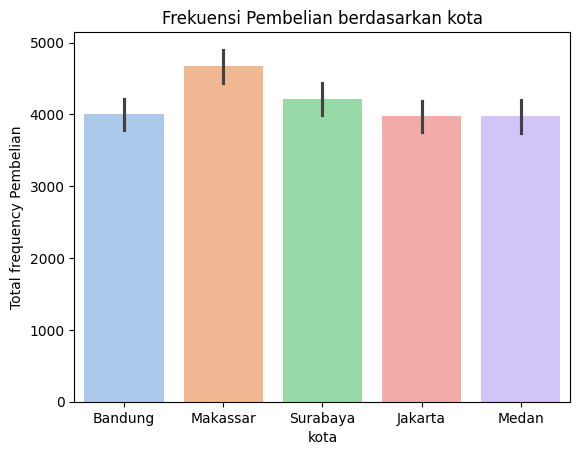

In [6]:
# Barplot
sns.barplot(data=df,
            x='City',
            y='Purchase_Frequency',
            estimator=sum,
            palette='pastel')
plt.title("Frekuensi Pembelian berdasarkan kota")
plt.xlabel("kota")
plt.ylabel("Total frequency Pembelian")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_3080\1903378928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


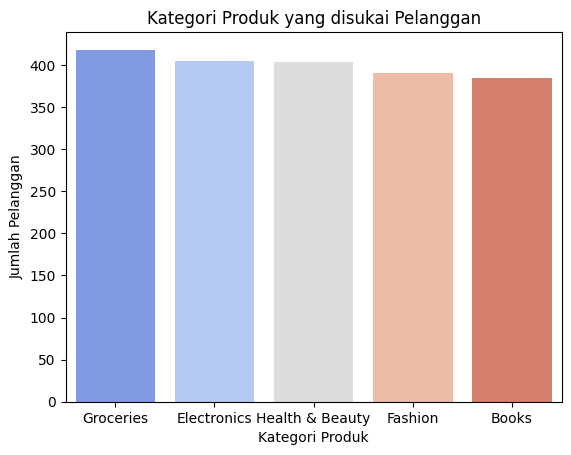

In [7]:
# Countplot kategori produk yang disukai
sns.countplot(data=df,
            x='Preferred_Product_Category',
            order=df['Preferred_Product_Category'].value_counts().index,
            palette='coolwarm')
plt.title("Kategori Produk yang disukai Pelanggan")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pelanggan")
plt.show()

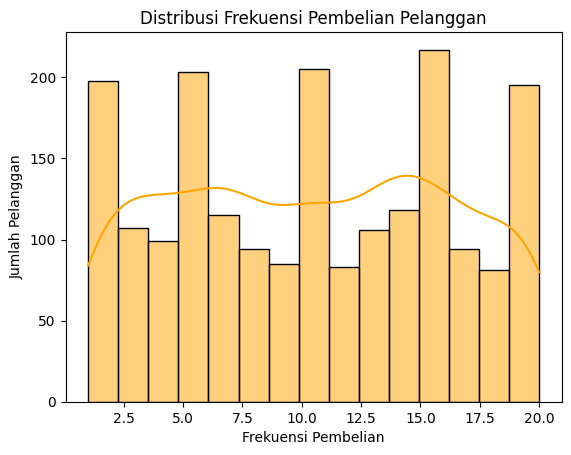

In [8]:
# Distribusi Pembelian pelanggan
sns.histplot(df['Purchase_Frequency'],
             kde=True,
             color='orange',
             bins=15)
plt.title("Distribusi Frekuensi Pembelian Pelanggan")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Jumlah Pelanggan")
plt.show()

### Simulasi

In [9]:
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514


In [10]:
features = ["Annual_Income",
            "Purchase_Frequency",
            "Average_Spending_Per_Transaction",
            "Total_Spent"]

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [12]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

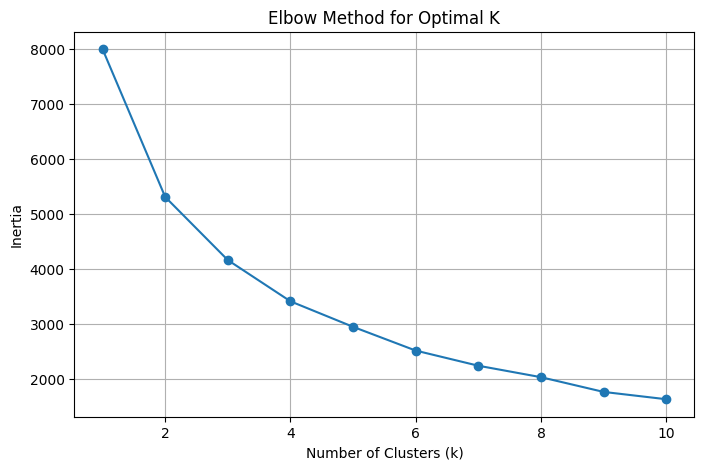

In [13]:
# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [14]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [15]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [16]:
colors = ['blue','green','red','purple']

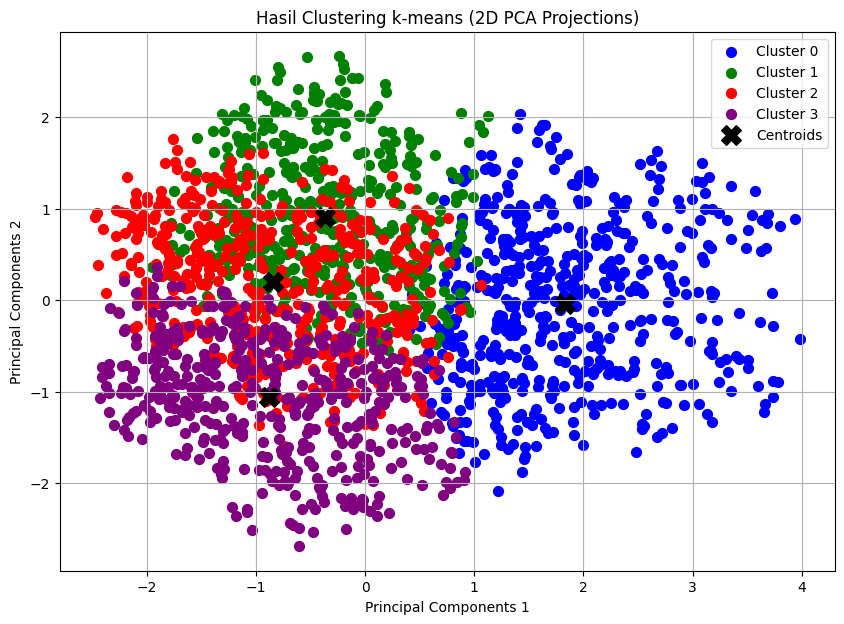

In [17]:
# Plot hasil Clustering
plt.figure(figsize=(10,7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[df['Cluster']==cluster]
    plt.scatter(cluster_points[:,0],
                cluster_points[:,1],
                s=50,
                label=f'Cluster {cluster}',
                color=colors[cluster]
                )
# Menambahkan Centroid pada plot
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=200,
            c='black',
            marker='X',
            label='Centroids')

# Menambahkan detail plot
plt.title("Hasil Clustering k-means (2D PCA Projections)")
plt.xlabel("Principal Components 1")
plt.ylabel("Principal Components 2")
plt.legend()
plt.grid()
plt.show()